<a href="https://colab.research.google.com/github/Shritej24c/HPE-DA/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!jt -t monokai -tf droidsans -fs 14 -altp -tfs 14 -dfs 11 -nfs 115 -cellw 98% -T

/bin/bash: jt: command not found


## Installing Packages using pip

In [2]:
!pip install --upgrade pip
!pip install numpy
!pip install pandas
!pip install scikit-learn --upgrade
!pip install matplotlib
!pip install seaborn
!pip install xgboost
!pip install scikit-optimize
!pip install bayesian-optimization
!pip install joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.6 MB/s eta 0:00:00


## Importing Packages

In [7]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
import pickle
import joblib
import time as t
import random

## Reading Data in CSV format

In [ ]:
df_dic = pd.read_excel('1_data_dictionary.xlsx')

In [ ]:
df_og = pd.read_csv('2_data.csv')

In [ ]:
df_og.head()

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,...,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,25,72,50,0,0,0,0,0,0,0
2,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
3,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
4,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,...,10,6,5,0,0,0,1,0,0,0


In [ ]:
pd.set_option('display.max_columns', None)
df_og.head()

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0


In [ ]:
df_og.rename(columns = {"Campaign ID" : "ID", 'Campaign Goal Code': "Goal", 'Campaign Ad ID': "Ad ID",
              'Ad Digital Channel': "Channel", 'Ad channel partner': "Partner",
             'Ad Device': "Device", 'Ad Group': "Group", 'Ad Content ID': "Content ID", 'Ad Content Type': 'Content Type',
             '$ Spend' : "Spend", '# Impressions' : "Impressions", '# Clicks': "Clicks", '# Video Completes': 'Video','# Social Likes': "Likes",
             '# Social Shares': "Shares", '# Web Visit': "Web", '# Collateral View': "Collateral",'# Product View' : "Product", '# Form Complete': "Forms"}, inplace = True)
df_og.head()

,Date,ID,Goal,Ad ID,Channel,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0


## Exploratory Data Analysis

In [ ]:
df_og.loc[df_og['Collateral'] == 1,].groupby(['Channel']).count()

,Date,ID,Goal,Ad ID,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms
Channel,,,,,,,,,,,,,,,,,,,,
Programmatic Display,526,526,526,526,526,0,0,424,525,526,526,526,526,526,526,526,526,526,526,526
Search,1077,1077,1077,1077,1077,1077,1077,0,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077
Social,20,20,20,20,20,0,0,14,20,20,20,20,20,20,20,20,20,20,20,20


In [ ]:
df_og.columns[:5]

Index(['Date', 'ID', 'Goal', 'Ad ID', 'Channel'], dtype='object')

In [ ]:
camp1 = df_og.loc[df_og['ID'] == 1, ].sort_values(by = ['Date', 'ID', "Ad ID", "Channel"])

In [ ]:
len(camp1['Date'].unique())


226

In [ ]:
len(camp1['Ad ID'].unique())

426

In [ ]:
camp1['Channel'].value_counts()

Programmatic Display    43791
Search                  29229
Social                   6978
Name: Channel, dtype: int64

In [ ]:
camp1['Goal'].value_counts()

Engagement       74233
Awareness         3063
Consideration     2160
Purchase           524
Intent to Buy       18
Name: Goal, dtype: int64

In [ ]:
camp1.head()

,Date,ID,Goal,Ad ID,Channel,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms
150521,01/01/23,1,Engagement,32,Social,Channel Partner 2,NaN,NaN,15.0,Video,Audience Type 2,1,2,0,0,0,0,0,0,0,0
107643,01/01/23,1,Engagement,34,Social,Channel Partner 2,NaN,NaN,18.0,Video,Audience Type 2,0,0,0,0,0,0,0,0,0,0
195114,01/01/23,1,Engagement,35,Social,Channel Partner 2,NaN,NaN,18.0,Video,Audience Type 2,72,5158,0,0,0,0,0,0,0,0
34583,01/01/23,1,Engagement,36,Social,Channel Partner 2,NaN,NaN,18.0,Video,Audience Type 2,13,6,0,0,0,0,0,0,0,0
110013,01/01/23,1,Engagement,71,Social,Channel Partner 2,NaN,NaN,22.0,Image,Audience Type 2,0,0,0,0,0,0,0,0,0,0


In [ ]:
camp1.groupby(['Goal', 'Channel', 'Audience Type'])['Spend'].sum()

Goal           Channel               Audience Type  
Awareness      Search                Audience Type 1     10545
                                     Audience Type 5       594
               Social                Audience Type 3     63335
Consideration  Search                Audience Type 1     27422
                                     Audience Type 5      9790
Engagement     Programmatic Display  Audience Type 2     94799
                                     Audience Type 3    301624
                                     Audience Type 4    225114
                                     Audience Type 5    115061
               Search                Audience Type 1    400714
                                     Audience Type 5     15379
               Social                Audience Type 2     71353
                                     Audience Type 3     21418
Intent to Buy  Search                Audience Type 5       329
Purchase       Search                Audience Type 1     10458
  

In [ ]:
social = df_og.loc[df_og['Channel'] == 'Social', ]

In [ ]:
social['Goal'].value_counts()

Engagement       25814
Awareness         7512
Consideration      269
Name: Goal, dtype: int64

In [ ]:
df_og['Goal'].value_counts()

Engagement       301212
Awareness         38892
Intent to Buy     31454
Consideration      7057
Purchase            524
Name: Goal, dtype: int64

In [ ]:
df_og.head()

,Date,ID,Goal,Ad ID,Channel,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0


In [ ]:
col = df_og.columns.to_list()
col

['Date',
 'ID',
 'Goal',
 'Ad ID',
 'Channel',
 'Partner',
 'Device',
 'Group',
 'Content ID',
 'Content Type',
 'Audience Type',
 'Spend',
 'Impressions',
 'Clicks',
 'Video',
 'Likes',
 'Shares',
 'Web',
 'Collateral',
 'Product',
 'Forms']

In [ ]:
df_og.sort_values(['Channel', 'Audience Type']).groupby(['Goal', 'Channel', 'Content Type', 'Audience Type'])[col[-10:]].sum()

Spend  \
Goal          Channel              Content Type Audience Type              
Awareness     Programmatic Display Image        Audience Type 2    20534   
                                                Audience Type 4    10861   
                                   Text         Audience Type 3      449   
                                                Audience Type 4        7   
                                   Video        Audience Type 2   423028   
                                                Audience Type 3    36259   
                                                Audience Type 4   156781   
                                                Audience Type 5     3091   
              Search               Text         Audience Type 1    10545   
                                                Audience Type 5      594   
              Social               Image        Audience Type 2    30464   
                                   Video        Audience Type 2    89217   
                                                Audience Type 3    66316   
Consideration Search               Text         Audience Type 1    92395   
                                                Audience Type 5    30413   
              Social               Video        Audience Type 3     7015   
Engagement    Programmatic Display Image        Audience Type 2     3228   
                                                Audience Type 3     2819   
                                                Audience Type 5       82   
                                   Text         Audience Type 3     5031   
                                                Audience Type 4       70   
                                   Video        Audience Type 2   409618   
                                                Audience Type 3  1325253   
                                                Audience Type 4  1040950   
                                                Audience Type 5   496643   
              Search               Text         Audience Type 1  1278293   
                                                Audience Type 5    40381   
              Social               Image        Audience Type 2   271827   
                                                Audience Type 3    81761   
                                   Video        Audience Type 2   204203   
                                                Audience Type 3     3979   
Intent to Buy Search               Text         Audience Type 1   511661   
                                                Audience Type 5    33547   
Purchase      Search               Text         Audience Type 1    10458   
                                                Audience Type 5     1370   

                                                                 Impressions  \
Goal          Channel              Content Type Audience Type                  
Awareness     Programmatic Display Image        Audience Type 2      5509038   
                                                Audience Type 4      3966323   
                                   Text         Audience Type 3        33115   
                                                Audience Type 4          141   
                                   Video        Audience Type 2     98758665   
                                                Audience Type 3      3128777   
                                                Audience Type 4     67335099   
                                                Audience Type 5       159550   
              Search               Text         Audience Type 1       773308   
                                                Audience Type 5        79898   
              Social               Image        Audience Type 2      6423387   
                                   Video        Audience Type 2      4472432   
                                                Audience Type 3     34998742   
Consideration Search               Text         Audien

In [ ]:
df_og.sort_values(['Channel', 'Audience Type']).groupby([ 'Channel', 'Audience Type'])[col[-10:]].sum()

Spend  Impressions     Clicks  \
Channel              Audience Type                                      
Programmatic Display Audience Type 2   858216    188611353   30977060   
                     Audience Type 3  1370347    728421841  179834166   
                     Audience Type 4  1209228    327744356   43895526   
                     Audience Type 5   499816     57465892    5538302   
Search               Audience Type 1  1903352    152316960   41545684   
                     Audience Type 5   106305     11810551    2429635   
Social               Audience Type 2   595711     40816855   13065159   
                     Audience Type 3   159071     72689881   50367958   

                                         Video  Likes  Shares    Web  \
Channel              Audience Type                                     
Programmatic Display Audience Type 2   5649393    110       1   4582   
                     Audience Type 3   3668088    110       2  18322   
                     Audience Type 4  10020573    129       6   6665   
                     Audience Type 5    410849     60       2   4001   
Search               Audience Type 1   1645402    376      22  97005   
                     Audience Type 5    160729     31       2   2899   
Social               Audience Type 2   1162640   2130      30   1056   
                     Audience Type 3   1868786   6095     332    140   

                                      Collateral  Product  Forms  
Channel              Audience Type                                
Programmatic Display Audience Type 2         391      284      0  
                     Audience Type 3        2925     1667      3  
                     Audience Type 4         818      382      0  
                     Audience Type 5         754      464      0  
Search               Audience Type 1        8132    12975     67  
                     Audience Type 5         403      643      4  
Social               Audience Type 2         101      115      1  
                     Audience Type 3          13       21      0

In [ ]:
df_og.sort_values(['Channel', 'Audience Type']).groupby(["Goal", 'Channel', 'Audience Type'])[col[-10:]].sum()

Spend  Impressions  \
Goal          Channel              Audience Type                           
Awareness     Programmatic Display Audience Type 2   445370    104442564   
                                   Audience Type 3    37244      3214896   
                                   Audience Type 4   168208     71356559   
                                   Audience Type 5     3091       159550   
              Search               Audience Type 1    10545       773308   
                                   Audience Type 5      594        79898   
              Social               Audience Type 2   119681     10895819   
                                   Audience Type 3    66316     34998742   
Consideration Search               Audience Type 1    92395      3424645   
                                   Audience Type 5    30413      3025820   
              Social               Audience Type 3     7015      3800627   
Engagement    Programmatic Display Audience Type 2   412846     84168789   
                                   Audience Type 3  1333103    725206945   
                                   Audience Type 4  1041020    256387797   
                                   Audience Type 5   496725     57306342   
              Search               Audience Type 1  1278293    114555285   
                                   Audience Type 5    40381      5384975   
              Social               Audience Type 2   476030     29921036   
                                   Audience Type 3    85740     33890512   
Intent to Buy Search               Audience Type 1   511661     32961484   
                                   Audience Type 5    33547      3248927   
Purchase      Search               Audience Type 1    10458       602238   
                                   Audience Type 5     1370        70931   

                                                       Clicks    Video  Likes  \
Goal          Channel              Audience Type                                
Awareness     Programmatic Display Audience Type 2   15455402  3997797     50   
                                   Audience Type 3     719162   132665      4   
                                   Audience Type 4   10828672  2549343     17   
                                   Audience Type 5      47914     1176      0   
              Search               Audience Type 1     164477    10831      1   
                                   Audience Type 5      27500      876      0   
              Social               Audience Type 2    5126304    46130    572   
                                   Audience Type 3   24111626  1571389   2857   
Consideration Search               Audience Type 1     893978    43860      2   
                                   Audience Type 5     446137    41080      5   
              Social               Audience Type 3    2582186   145339    293   
Engagement    Programmatic Display Audience Type 2   15521658  1651596     60   
                                   Audience Type 3  179115004  3535423    106   
                                   Audience Type 4   33066854  7471230    112   
                                   Audience Type 5    5490388   409673     60   
              Search               Audience Type 1   33023256  1177475    294   
                                   Audience Type 5    1193852    76326     11   
              Social               Audience Type 2    7938855  1116510   1558   
                                   Audience Type 3   23674146   152058   2945   
Intent to Buy Search               Audience Type 1    7279255   407672     79   
                                   Audience Type 5     741283    34443     15   
Purchase      Search               Audience Type 1     184718     5564      0   
                                   Audience Type 5      20863     8004      0   

                                                    Shares    Web  Collateral  \
Goal          Channel              Audience Ty

In [ ]:
df_og.sort_values(['Channel']).groupby(["Goal", 'Channel'])[col[-10:]].sum()

Spend  Impressions     Clicks     Video  \
Goal          Channel                                                           
Awareness     Programmatic Display   653913    179173569   27051150   6680981   
              Search                  11139       853206     191977     11707   
              Social                 185997     45894561   29237930   1617519   
Consideration Search                 122808      6450465    1340115     84940   
              Social                   7015      3800627    2582186    145339   
Engagement    Programmatic Display  3283694   1123069873  233193904  13067922   
              Search                1318674    119940260   34217108   1253801   
              Social                 561770     63811548   31613001   1268568   
Intent to Buy Search                 545208     36210411    8020538    442115   
Purchase      Search                  11828       673169     205581     13568   

                                    Likes  Shares    Web  Collateral  Product  \
Goal          Channel                                                           
Awareness     Programmatic Display     71       1   3321         165      190   
              Search                    1       0    520          25        3   
              Social                 3429     127    224          13       27   
Consideration Search                    7       0   4462         701      957   
              Social                  293      12      3           1        1   
Engagement    Programmatic Display    338      10  30249        4723     2607   
              Search                  305      20  74160        3365     1054   
              Social                 4503     223    969         100      108   
Intent to Buy Search                   94       4  20142        4348    11558   
Purchase      Search                    0       0    620          96       46   

                                    Forms  
Goal          Channel                      
Awareness     Programmatic Display      0  
              Search                    0  
              Social                    0  
Consideration Search                    4  
              Social                    0  
Engagement    Programmatic Display      3  
              Search                   51  
              Social                    1  
Intent to Buy Search                   16  
Purchase      Search                    0

In [ ]:
df_og.sort_values(['Channel']).groupby(["Goal", 'Channel', 'Content Type'])[col[-10:]].sum()

Spend  Impressions  \
Goal          Channel              Content Type                         
Awareness     Programmatic Display Image           31395      9475361   
                                   Text              456        33256   
                                   Video          619159    169382091   
              Search               Text            11139       853206   
              Social               Image           30464      6423387   
                                   Video          155533     39471174   
Consideration Search               Text           122808      6450465   
              Social               Video            7015      3800627   
Engagement    Programmatic Display Image            6129       448223   
                                   Text             5101      1125285   
                                   Video         3272464   1121496365   
              Search               Text          1318674    119940260   
              Social               Image          353588     50021519   
                                   Video          208182     13790029   
Intent to Buy Search               Text           545208     36210411   
Purchase      Search               Text            11828       673169   

                                                    Clicks     Video  Likes  \
Goal          Channel              Content Type                               
Awareness     Programmatic Display Image           3549051     12713      4   
                                   Text               3050         0      0   
                                   Video          23315699   6668268     67   
              Search               Text             191977     11707      1   
              Social               Image           3929710       832    364   
                                   Video          25308220   1616687   3065   
Consideration Search               Text            1340115     84940      7   
              Social               Video           2582186    145339    293   
Engagement    Programmatic Display Image             68920         0      0   
                                   Text             393406      8288      2   
                                   Video         232731578  13059634    336   
              Search               Text           34217108   1253801    305   
              Social               Image          27418852    184401   4031   
                                   Video           4194149   1084167    472   
Intent to Buy Search               Text            8020538    442115     94   
Purchase      Search               Text             205581     13568      0   

                                                 Shares    Web  Collateral  \
Goal          Channel              Content Type                              
Awareness     Programmatic Display Image              0    402          43   
                                   Text               0      0           0   
                                   Video              1   2734         121   
              Search               Text               0    520          25   
              Social               Image              4     48           4   
                                   Video            123    176           9   
Consideration Search               Text               0   4462         701   
              Social               Video             12      3           1   
Engagement    Programmatic Display Image              0      4           0   
                                   Text               0     77           8   
                                   Video             10  30168        4715   
              Search               Text              20  74160        3365   
              Social               Image            214    557          63   
                                   Video              9    412          37   
Intent to Buy Search               Text               4  20142   

In [ ]:
df_og.sort_values(['Channel']).groupby(["Goal"])[col[-10:]].sum()

,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms
Goal,,,,,,,,,,
Awareness,851049,225921336,56481057,8310207,3501,128,4065,203,220,0
Consideration,129823,10251092,3922301,230279,300,12,4465,702,958,4
Engagement,5164138,1306821681,299024013,15590291,5146,253,105378,8188,3769,55
Intent to Buy,545208,36210411,8020538,442115,94,4,20142,4348,11558,16
Purchase,11828,673169,205581,13568,0,0,620,96,46,0


In [ ]:
df_og.groupby(['ID', "Goal"])['Spend'].sum()

ID  Goal         
1   Awareness          74474
    Consideration      37212
    Engagement       1245462
    Intent to Buy        329
    Purchase           11828
2   Consideration        753
    Engagement        962906
    Intent to Buy     102581
3   Consideration      77889
    Engagement       1303791
    Intent to Buy     442298
4   Awareness         773594
    Consideration       7436
    Engagement        333175
5   Awareness           2981
    Consideration       6533
    Engagement       1318804
Name: Spend, dtype: int64

In [ ]:
df_og.groupby(['ID', "Goal"])['Spend'].sum().sort_values(ascending=False)

ID  Goal         
5   Engagement       1318804
3   Engagement       1303791
1   Engagement       1245462
2   Engagement        962906
4   Awareness         773594
3   Intent to Buy     442298
4   Engagement        333175
2   Intent to Buy     102581
3   Consideration      77889
1   Awareness          74474
    Consideration      37212
    Purchase           11828
4   Consideration       7436
5   Consideration       6533
    Awareness           2981
2   Consideration        753
1   Intent to Buy        329
Name: Spend, dtype: int64

In [ ]:
df_og.groupby(['ID']).agg({'Date': ['max', 'min']})

Date          
          max       min
ID                     
1   9/30/2022  01/01/23
2   9/30/2022  01/01/23
3   9/30/2022  01/01/23
4   9/30/2022  01/01/23
5   9/30/2022  01/01/23

In [ ]:
channels = df_og['Channel'].drop_duplicates().to_list()
channels

['Search', 'Social', 'Programmatic Display']

In [ ]:
df_og['Channel'].unique()

array(['Search', 'Social', 'Programmatic Display'], dtype=object)

In [ ]:
df_og.loc[(df_og['Impressions']==0) , col[-10:]].describe().T

,count,mean,std,min,25%,50%,75%,max
Spend,97621.0,0.042245,0.734603,0.0,0.0,0.0,0.0,56.0
Impressions,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Clicks,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Video,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Likes,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Shares,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Web,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Collateral,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Product,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Forms,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
col

['Date',
 'ID',
 'Goal',
 'Ad ID',
 'Channel',
 'Partner',
 'Device',
 'Group',
 'Content ID',
 'Content Type',
 'Audience Type',
 'Spend',
 'Impressions',
 'Clicks',
 'Video',
 'Likes',
 'Shares',
 'Web',
 'Collateral',
 'Product',
 'Forms']

In [ ]:
df_og.loc[(df_og['Spend']==0) & (df_og['Impressions']!=0), col[-10:]].describe(percentiles = [.1, .4, 0.6, .8, .9, .95]).T

,count,mean,std,min,10%,40%,50%,60%,80%,90%,95%,max
Spend,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Impressions,16034.0,24.636897,92.416021,1.0,1.0,4.0,6.0,9.0,23.0,50.0,96.0,4104.0
Clicks,16034.0,0.303418,21.783723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0
Video,16034.0,0.114819,3.252427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0
Likes,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shares,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Web,16034.0,0.000062,0.007897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Collateral,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Product,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Forms,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
empty_ind = df_og[(df_og['Spend']==0) & (df_og['Impressions']==0)].index
empty_ind

Int64Index([     0,      2,      3,      6,      9,     31,     32,     36,
                37,     39,
            ...
            379123, 379124, 379125, 379129, 379130, 379131, 379132, 379133,
            379134, 379135],
           dtype='int64', length=96705)

In [ ]:
df_og.drop(index=empty_ind, inplace=True)

In [ ]:
df_og['CTR'] = df_og.apply(lambda x: x['Clicks']/x['Impressions'] if x['Impressions']!=0 else 0, axis=1)
df_og['CPC'] = df_og.apply(lambda x: x['Clicks']/x['Spend'] if x['Spend']!=0 else 0, axis=1)

## Plots

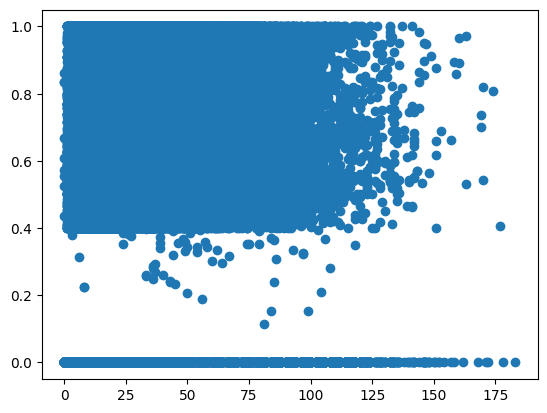

In [ ]:
#fig, axes = plt.subplots(len(a), len(b), figsize=(20,12), sharey=True)

s = df_og[df_og['Channel'] == 'Search'].sort_values(['Spend'])

plt.scatter(s['Spend'], s['CTR'])



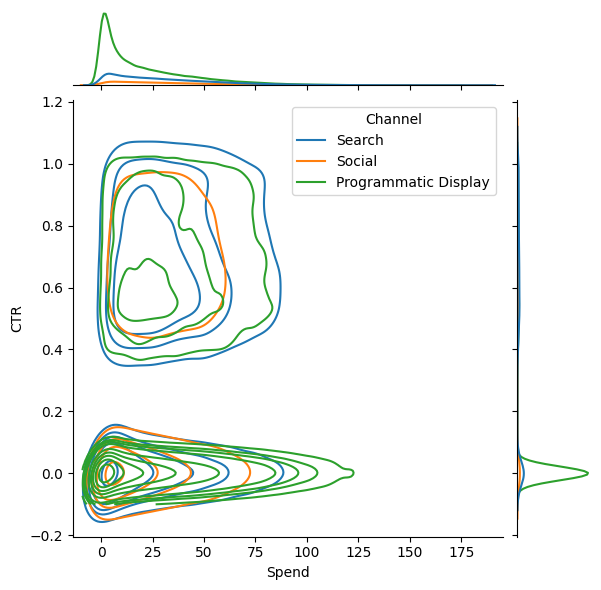

In [ ]:
sns.jointplot(x = "Spend", y="CTR", data=df_og, hue = "Channel", kind = 'kde')


In [ ]:
df_new = pd.get_dummies(df_og, columns=['Goal', 'Channel', 'Content Type','Audience Type'], drop_first=True)

## Linear Regression Model

In [ ]:
x = df_new[[ 'Channel_Search',
            'Channel_Social','Audience Type_Audience Type 2','Audience Type_Audience Type 3',
            'Audience Type_Audience Type 4', 'Audience Type_Audience Type 5','Spend']]
y =  df_og['CTR']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
lr.score(x, y)

0.26948963532031545

<Axes: >

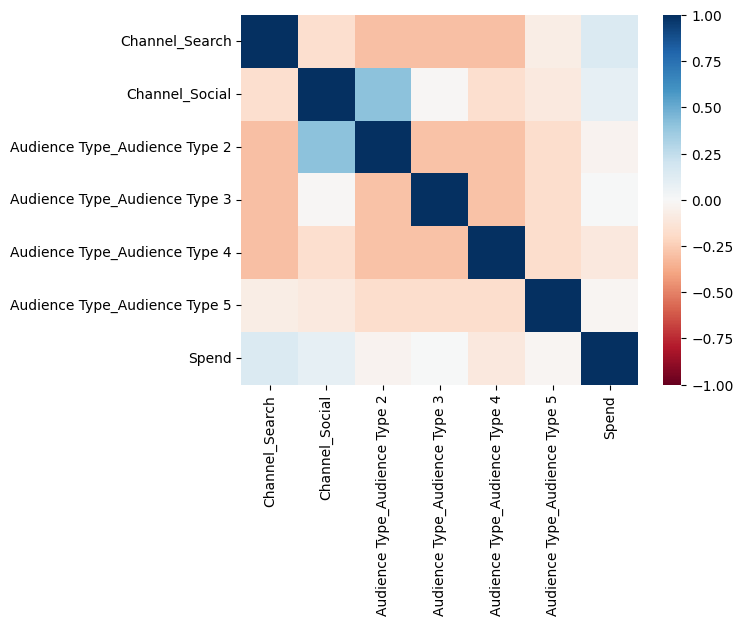

In [ ]:

sns.heatmap(x.corr(), cmap = 'RdBu', vmin = -1, vmax =1)

In [ ]:
x.corr()

,Channel_Search,Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5,Spend
Channel_Search,1.000000,-0.170661,-0.304444,-0.299699,-0.299964,-0.077368,0.146793
Channel_Social,-0.170661,1.000000,0.406950,-0.010283,-0.165364,-0.100035,0.093336
Audience Type_Audience Type 2,-0.304444,0.406950,1.000000,-0.294735,-0.294996,-0.178454,-0.031451
Audience Type_Audience Type 3,-0.299699,-0.010283,-0.294735,1.000000,-0.290398,-0.175673,0.007791
Audience Type_Audience Type 4,-0.299964,-0.165364,-0.294996,-0.290398,1.000000,-0.175828,-0.105330
Audience Type_Audience Type 5,-0.077368,-0.100035,-0.178454,-0.175673,-0.175828,1.000000,-0.019005
Spend,0.146793,0.093336,-0.031451,0.007791,-0.105330,-0.019005,1.000000


In [ ]:
x

,Channel_Search,Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5,Spend
1,1,0,0,0,0,0,25
4,1,0,0,0,0,0,10
5,1,0,0,0,0,0,9
7,1,0,0,0,0,0,6
8,1,0,0,0,0,0,3
...,...,...,...,...,...,...,...
379127,1,0,0,0,0,0,12
379128,1,0,0,0,0,0,19
379136,0,0,0,1,0,0,35
379137,0,0,0,0,0,1,56


In [ ]:
df_new.head()

,Date,ID,Ad ID,Partner,Device,Group,Content ID,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms,CTR,CPC,test_y,test_y1,test_y2,y_final,Goal_Consideration,Goal_Engagement,Goal_Intent to Buy,Goal_Purchase,Channel_Search,Channel_Social,Content Type_Text,Content Type_Video,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5
1,12/14/2022,3,921,Channel Partner 1,Computers,13.0,NaN,25,72,50,0,0,0,0,0,0,0,0.694444,2.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0,0
4,01/11/23,3,921,Channel Partner 1,Computers,20.0,NaN,10,6,5,0,0,0,1,0,0,0,0.833333,0.5,0.0,0.0,0.2,0.2,0,0,1,0,1,0,1,0,0,0,0,0
5,02/10/23,3,921,Channel Partner 1,Mobile,10.0,NaN,9,537,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0,0
7,12/26/2022,1,901,Channel Partner 1,Mobile,27.0,NaN,6,65,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0
8,12/29/2022,1,901,Channel Partner 1,Mobile,27.0,NaN,3,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0


In [ ]:
avg_imp_aware = df_og.loc[df_og['Goal'] == 'Awareness', 'Impressions'].mean()

In [ ]:
avg_imp_aware

6880.713163184504

In [ ]:
std_imp_aware = df_og.loc[df_og['Goal'] == 'Awareness', 'Impressions'].std()

In [ ]:
std_imp_aware

12094.943097050758

In [ ]:
med_imp_aware = df_og.loc[df_og['Goal'] == 'Awareness', 'Impressions'].median()

In [ ]:
med_imp_aware

2346.5

## Trying out different Metrics to measure

In [ ]:
df_og['test_y'] = df_og.apply(lambda x: int(x['Goal'] == 'Awareness')*(( x['Clicks'] + (int(x['Channel'] == 'Programmatic Display') +
                                                                                           int(x['Channel'] == 'Social'))*x['Video'] ) /x["Impressions"]) if x["Impressions"] != 0 else 0 , axis=1)

In [ ]:
df_og.loc[(df_og['Goal'] == 'Awareness') & (df_og['CTR'] != 0), ['CTR','test_y']].describe().T

,count,mean,std,min,25%,50%,75%,max
CTR,8411.0,0.687369,0.164779,0.062748,0.554017,0.673401,0.821918,1.000000
test_y,8411.0,0.789225,0.282729,0.062748,0.585326,0.734222,0.915094,1.856404


In [ ]:
df_og['test_y1'] = df_og.apply(lambda x: (int(x['Goal'] == 'Consideration') + int(x['Goal'] == 'Engagement'))*(x['Clicks'] +
                                                                            (int(x['Channel'] == 'Programmatic Display') + int(x['Channel'] == 'Social'))*x['Video'] +
                                                                            int(x['Channel'] == "Social")*(x["Likes"] + x["Shares"])+
                                                                            x["Web"] + x["Collateral"] + x['Product'] ) /x["Impressions"] if x["Impressions"] != 0 else 0 , axis=1)

In [ ]:
df_og

,Date,ID,Goal,Ad ID,Channel,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms,CTR,CPC,test_y,test_y1
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0,0.694444,2.000000,0.0,0.000000
4,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0,0.833333,0.500000,0.0,0.000000
5,02/10/23,3,Intent to Buy,921,Search,Channel Partner 1,Mobile,10.0,NaN,Text,Audience Type 1,9,537,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
7,12/26/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,Audience Type 1,6,65,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
8,12/29/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,Audience Type 1,3,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379127,8/24/2022,4,Engagement,875,Search,Channel Partner 5,Mobile,3.0,NaN,Text,Audience Type 1,12,76,55,0,0,0,0,0,0,0,0.723684,4.583333,0.0,0.723684
379128,8/29/2022,4,Engagement,875,Search,Channel Partner 5,Computers,3.0,NaN,Text,Audience Type 1,19,49,35,0,0,0,0,0,0,0,0.714286,1.842105,0.0,0.714286
379136,10/07/22,1,Engagement,262,Programmatic Display,Channel Partner 3,NaN,NaN,13.0,Video,Audience Type 3,35,23770,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000
379137,01/05/23,1,Engagement,508,Programmatic Display,Channel Partner 3,NaN,NaN,28.0,Video,Audience Type 5,56,4419,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000


In [ ]:
df_og.loc[(df_og['Goal'] == 'Consideration') | (df_og['Goal'] == 'Engagement') & (df_og['CTR'] != 0), ['CTR','test_y', 'test_y1']].describe().T

,count,mean,std,min,25%,50%,75%,max
CTR,62906.0,0.669513,0.194738,0.0,0.541182,0.666311,0.817383,1.000000
test_y,62906.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
test_y1,62906.0,0.712260,0.253230,0.0,0.555149,0.687758,0.854956,3.478261


In [ ]:
df_og['test_y2'] = df_og.apply(lambda x: (int(x['Goal'] == 'Purchase') + int(x['Goal'] == 'Intent to Buy'))*( x['Forms'] +
                                                                            x["Web"] + x["Collateral"] + x['Product'] ) /x["Clicks"] if x["Clicks"] != 0 else x['CTR'] , axis=1)

In [ ]:
df_og.loc[(df_og['Goal'] == 'Purchase') | (df_og['Goal'] == 'Intent to Buy') & (df_og['CTR'] != 0), ['CTR', 'test_y2']].describe().T

,count,mean,std,min,25%,50%,75%,max
CTR,11629.0,0.705624,0.196797,0.0,0.546892,0.675676,0.880282,1.0
test_y2,11629.0,0.171542,0.420305,0.0,0.000000,0.000000,0.100000,3.0


In [ ]:
df_og['Goal'].drop_duplicates()

1       Intent to Buy
7          Engagement
15          Awareness
45      Consideration
2629         Purchase
Name: Goal, dtype: object

In [ ]:
df_og.head()

,Date,ID,Goal,Ad ID,Channel,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms,CTR,CPC,test_y,test_y1,test_y2
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0,0.694444,2.0,0.0,0.0,0.0
4,01/11/23,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0,0.833333,0.5,0.0,0.0,0.2
5,02/10/23,3,Intent to Buy,921,Search,Channel Partner 1,Mobile,10.0,NaN,Text,Audience Type 1,9,537,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0
7,12/26/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,Audience Type 1,6,65,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0
8,12/29/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,Audience Type 1,3,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
df_og['y_final'] = df_og['test_y'] + df_og['test_y1'] + df_og['test_y2']

In [ ]:
df_new = pd.get_dummies(df_og, columns=['Goal', 'Channel', 'Content Type','Audience Type'], drop_first=True)



In [ ]:
df_new.head()

,Date,ID,Ad ID,Partner,Device,Group,Content ID,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms,CTR,CPC,test_y,test_y1,test_y2,y_final,Goal_Consideration,Goal_Engagement,Goal_Intent to Buy,Goal_Purchase,Channel_Search,Channel_Social,Content Type_Text,Content Type_Video,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5
1,12/14/2022,3,921,Channel Partner 1,Computers,13.0,NaN,25,72,50,0,0,0,0,0,0,0,0.694444,2.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0,0
4,01/11/23,3,921,Channel Partner 1,Computers,20.0,NaN,10,6,5,0,0,0,1,0,0,0,0.833333,0.5,0.0,0.0,0.2,0.2,0,0,1,0,1,0,1,0,0,0,0,0
5,02/10/23,3,921,Channel Partner 1,Mobile,10.0,NaN,9,537,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0,0
7,12/26/2022,1,901,Channel Partner 1,Mobile,27.0,NaN,6,65,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0
8,12/29/2022,1,901,Channel Partner 1,Mobile,27.0,NaN,3,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0


(array([1.51952e+05, 5.98830e+04, 3.67610e+04, 2.02880e+04, 8.62700e+03,
        3.35700e+03, 1.17700e+03, 2.96000e+02, 7.30000e+01, 2.00000e+01]),
 array([  0. ,  18.3,  36.6,  54.9,  73.2,  91.5, 109.8, 128.1, 146.4,
        164.7, 183. ]),
 <BarContainer object of 10 artists>)

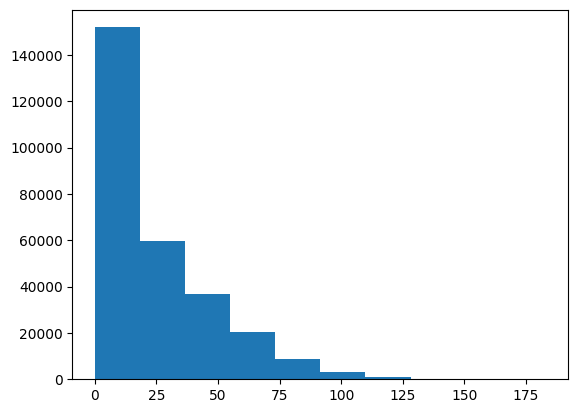

In [ ]:
plt.hist(x['Spend'])

In [ ]:


x = rs.fit_transform(x)

## Save X and Y

In [ ]:
x = df_new[[ 'Channel_Search',
            'Channel_Social','Audience Type_Audience Type 2','Audience Type_Audience Type 3',
            'Audience Type_Audience Type 4', 'Audience Type_Audience Type 5','Spend']]
y =  df_og[['Impressions', 'Clicks', 'CTR', 'CPC']]

In [ ]:
x.to_csv('xvar.csv', index = False)
y.to_csv('yvar.csv', index = False)

In [2]:
x = pd.read_csv('xvar.csv')
y = pd.read_csv('yvar.csv')

x.head()
#print(y.head())

,Channel_Search,Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5,Spend
0,1,0,0,0,0,0,25
1,1,0,0,0,0,0,10
2,1,0,0,0,0,0,9
3,1,0,0,0,0,0,6
4,1,0,0,0,0,0,3


In [4]:
y.head()

,Impressions,Clicks,CTR,CPC
0,72,50,0.694444,2.0
1,6,5,0.833333,0.5
2,537,0,0.000000,0.0
3,65,0,0.000000,0.0
4,0,0,0.000000,0.0


In [5]:

rs = RobustScaler()
x = rs.fit_transform(x)
lr = LinearRegression()
lr.fit(x, y['CTR'])
lr.score(x, y['CTR'])

0.26948963532031556

<Axes: >

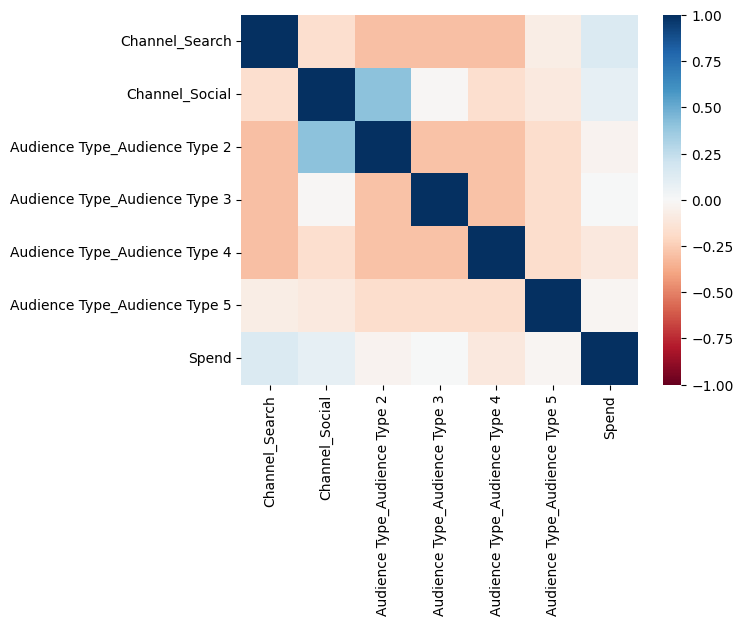

In [ ]:
sns.heatmap(x.corr(), cmap = 'RdBu', vmin = -1, vmax =1)

In [ ]:
x

,Channel_Search,Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5,Spend
0,1,0,0,0,0,0,25
1,1,0,0,0,0,0,10
2,1,0,0,0,0,0,9
3,1,0,0,0,0,0,6
4,1,0,0,0,0,0,3
...,...,...,...,...,...,...,...
282429,1,0,0,0,0,0,12
282430,1,0,0,0,0,0,19
282431,0,0,0,1,0,0,35
282432,0,0,0,0,0,1,56


In [ ]:
x.corr()

,Channel_Search,Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5,Spend
Channel_Search,1.000000,-0.170661,-0.304444,-0.299699,-0.299964,-0.077368,0.146793
Channel_Social,-0.170661,1.000000,0.406950,-0.010283,-0.165364,-0.100035,0.093336
Audience Type_Audience Type 2,-0.304444,0.406950,1.000000,-0.294735,-0.294996,-0.178454,-0.031451
Audience Type_Audience Type 3,-0.299699,-0.010283,-0.294735,1.000000,-0.290398,-0.175673,0.007791
Audience Type_Audience Type 4,-0.299964,-0.165364,-0.294996,-0.290398,1.000000,-0.175828,-0.105330
Audience Type_Audience Type 5,-0.077368,-0.100035,-0.178454,-0.175673,-0.175828,1.000000,-0.019005
Spend,0.146793,0.093336,-0.031451,0.007791,-0.105330,-0.019005,1.000000


In [ ]:
x

,Channel_Search,Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5,Spend
0,1,0,0,0,0,0,25
1,1,0,0,0,0,0,10
2,1,0,0,0,0,0,9
3,1,0,0,0,0,0,6
4,1,0,0,0,0,0,3
...,...,...,...,...,...,...,...
282429,1,0,0,0,0,0,12
282430,1,0,0,0,0,0,19
282431,0,0,0,1,0,0,35
282432,0,0,0,0,0,1,56


In [ ]:
yvar = rs.fit_transform(df_og[["Impressions", "Clicks", "Video"]])
yvar

NameError: ignored

In [ ]:
y = np.sum(yvar, axis = 1)
y

array([ 2.33740473,  0.07450655, -0.07172171, ...,  4.46863397,
        0.68692593, -0.07152628])

In [ ]:
y.shape

(282434,)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, df_og['CTR'])
lr.score(x, df_og['CTR'])

0.26948963532031556

In [ ]:
lr.coef_

array([ 0.24138876,  0.21581265, -0.08450267,  0.01291154, -0.05807735,
       -0.1071547 ,  0.11281468])

In [ ]:
var = df_og.columns.to_list()
var

['Date',
 'ID',
 'Goal',
 'Ad ID',
 'Channel',
 'Partner',
 'Device',
 'Group',
 'Content ID',
 'Content Type',
 'Audience Type',
 'Spend',
 'Impressions',
 'Clicks',
 'Video',
 'Likes',
 'Shares',
 'Web',
 'Collateral',
 'Product',
 'Forms',
 'CTR',
 'CPC',
 'test_y',
 'test_y1',
 'test_y2',
 'y_final']

In [ ]:
np.random.randint(0, 2, 16*2)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0])

## Permutation and Combination of all Regressor on various metrics

In [3]:
!pip install bayesian-optimization

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()


rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
br = BaggingRegressor()
gbr = GradientBoostingRegressor()
sr = StackingRegressor(estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))])
vr = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
etr = ExtraTreesRegressor()

models = {"RFR" : rfr, "AdaBoostRegressor" : abr, "BaggingRegressor": br, "GradientBoostingRegressor": gbr, "StackingRegressor": sr, "VotingRegressor": vr, "ExtraTreesRegressor": etr}



In [5]:
var[12:]

NameError: ignored

In [ ]:
for k, m in models.items():
    for v in ['Impressions', 'Clicks', 'CTR', 'CPC']:
        m.fit(x, df_og[v])
        score = m.score(x, df_og[v])
        print(k +"  " + v + " Score is : ", score)



RFR  Impressions Score is :  0.473397728020464
RFR  Clicks Score is :  0.2193253624329169
RFR  CTR Score is :  0.34159471282742127
RFR  CPC Score is :  0.159490543690871
AdaBoostRegressor  Impressions Score is :  0.29753278603239286
AdaBoostRegressor  Clicks Score is :  -0.2414135878883965
AdaBoostRegressor  CTR Score is :  0.20516091130093084
AdaBoostRegressor  CPC Score is :  -0.1177278086487683
BaggingRegressor  Impressions Score is :  0.4724682682080288
BaggingRegressor  Clicks Score is :  0.21814942282883232
BaggingRegressor  CTR Score is :  0.34123378322324693
BaggingRegressor  CPC Score is :  0.15910451730870234
GradientBoostingRegressor  Impressions Score is :  0.4595494245787123
GradientBoostingRegressor  Clicks Score is :  0.20442524699260856
GradientBoostingRegressor  CTR Score is :  0.33301344376715536
GradientBoostingRegressor  CPC Score is :  0.15581884262449963
StackingRegressor  Impressions Score is :  0.3448850857422787
StackingRegressor  Clicks Score is :  0.121800350

0

In [ ]:
rfr.fit(x, df_og['Impressions'])
rfr.score(x, df_og['Impressions'])

0.473387936404994

In [ ]:
c

197271516

In [21]:
xtest = pd.DataFrame({"Channel" : ["Search", "Programmatic Display", "Social"]*5, "Audience Type": ['Audience Type 1', 'Audience Type 2', 'Audience Type 3', 'Audience Type 4', 'Audience Type 5']*3})
xtest = pd.get_dummies(xtest, drop_first=True)
xtest

,Channel_Search,Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,0,1,0,1,0,0
3,1,0,0,0,1,0
4,0,0,0,0,0,1
5,0,1,0,0,0,0
6,1,0,1,0,0,0
7,0,0,0,1,0,0
8,0,1,0,0,1,0
9,1,0,0,0,0,1


In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(colsample=  1.0, gamma = 5.0, learning_rate = 0.01, max_depth =  10, n_estimators = 1000, subsample = 1.0)
xgbr.fit(x, y['Clicks'])
xgbr.score(x,y['Clicks'] )

[04:29:21] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample" } are not used.



0.2201407033335796

In [ ]:
from skopt import BayesSearchCV
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

# Generate a sample regression dataset
#X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# Define the XGBRegressor model
model = XGBRegressor()

# Define the search space for hyperparameters
search_space = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (100, 1000),
    'max_depth': (1, 10),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1.0, 'uniform'),
    'gamma': (0.01, 1.0, 'log-uniform')
}

# Perform Bayesian optimization
optimizer = BayesSearchCV(model, search_space, n_iter=50, cv=5)
optimizer.fit(x, df_og['Clicks'])

# Print the best hyperparameters aand corresponding score
print("Best score:", optimizer.best_score_)
print("Best hyperparameters:", optimizer.best_params_)


AttributeError: ignored

In [ ]:
import numpy as np
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (0.5, 1.0),  # Change for big datasets
    'colsample': (0.8, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)}

def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):

    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    clf = XGBRegressor(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, x, df_og['Clicks'], cv=3, scoring = 'neg_mean_absolute_percentage_error'))

optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | -2.768e+1 | 0.8834    | 3.602     | 0.01011   | 5.116     | 232.1     | 0.5462    |
| 2         | -3.074e+1 | 0.8373    | 1.728     | 0.4028    | 6.772     | 477.3     | 0.8426    |
| 3         | -3.071e+1 | 0.8409    | 4.391     | 0.03711   | 7.693     | 475.6     | 0.7793    |
| 4         | -3.074e+1 | 0.8281    | 0.9905    | 0.8027    | 9.778     | 382.1     | 0.8462    |
| 5         | -3.112e+1 | 0.9753    | 4.473     | 0.09419   | 3.273     | 252.8     | 0.9391    |
| 6         | -2.732e+1 | 0.8446    | 3.227     | 0.01      | 5.911     | 223.1     | 0.5       |
| 7         | -2.711e+1 | 1.0       | 5.0       | 0.01      | 3.0       | 198.4     | 1.0       |
| 8         | -3.074e+1 | 0.8       | 0.0       | 1.0       | 10.0      | 171.4     | 0.5       |
| 9         | -3.073

{'colsample': 1.0, 'gamma': 5.0, 'learning_rate': 0.01, 'max_depth': 3.0, 'n_estimators': 198.3503859684554, 'subsample': 1.0}


In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
X, Y = make_regression(n_samples=100, n_features=10, random_state=42)

df_og['Clicks'].shape
x.shape

(282434, 7)

## Final Regression on Impressions and Clicks

In [7]:
t1 = t.time()
rfr_imp = RandomForestRegressor(max_depth = 10, n_estimators = 1000)
rfr_imp.fit(x, y['Impressions'])

t2 = t.time()

xgbr = XGBRegressor(colsample=  1.0, gamma = 5.0, learning_rate = 0.01, max_depth =  10, n_estimators = 1000, subsample = 1.0)
xgbr.fit(x, y['Clicks'])

t3 = t.time()

[19:52:37] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None, colsample=1.0,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=5.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [8]:
f_rfr_imp = 'Impressions_RF.sav'
pickle.dump(rfr_imp, open(f_rfr_imp, 'wb'))

f_xgbr_clk = 'Clicks_XGB.sav'
pickle.dump(xgbr, open(f_xgbr_clk, 'wb'))



In [12]:
#Using Joblib
rfr_imp = joblib.load('Impressions_RF.sav')
xgbr = joblib.load('Clicks_XGB.sav')


In [9]:
xgbr = pickle.load(open('Clicks_XGB.sav', 'rb'))
rfr_imp = pickle.load(open('Impressions_RF.sav', 'rb'))


UnpicklingError: ignored

## Genetic Algorithm

In [13]:
# genetic algorithm search for continuous function optimization

import numpy as np
from numpy.random import randint
from numpy.random import rand

from random import choices, randint, randrange, sample, random
from typing import List, Optional, Callable, Tuple

Genome = List[int]
Population = List[Genome]
PopulateFunc = Callable[[], Population]
FitnessFunc = Callable[[Genome], int]
SelectionFunc = Callable[[Population, FitnessFunc], Tuple[Genome, Genome]]
CrossoverFunc = Callable[[Genome, Genome], Tuple[Genome, Genome]]
MutationFunc = Callable[[Genome], Genome]
PrinterFunc = Callable[[Population, int, FitnessFunc], None]


def regressor(x):
    return output

def generate_skewed_number(min_value, max_value, skewness):
    # Generate a random number from a power distribution
    random_number = np.random.power(skewness)

    # Rescale the number to the desired range
    skewed_number = min_value + random_number * (max_value - min_value)

    return int(skewed_number)


def generate_genome(num_numbers, total_sum, min_val, max_val) -> Genome:
    numbers = []
    while len(numbers) < num_numbers - 1:
        num = randint(min_val, max_val)
        if total_sum - sum(numbers) - num >= min_val * (num_numbers - len(numbers) - 1):
            numbers.append(num)
    numbers.append(total_sum - sum(numbers))
    binary_numbers = []  # This will store the binary representation of each number
    for number in numbers:
        binary = int_to_bin(number)  # Convert the number to binary and remove the '0b' prefix
        binary_numbers.append(binary)
    return binary_numbers, numbers


'''

def generate_genome2(num_numbers, total_sum, min_val, max_val) -> Genome:
    numbers = []
    while len(numbers) < num_numbers - 1:
        num = randint(min_val, min(max_val, total_sum - sum(numbers)))
        numbers.append(num)
    numbers.append(total_sum - sum(numbers))
    binary_numbers = []  # This will store the binary representation of each number

    for number in numbers:
        print(number)
        binary = int_to_bin(number)  # Convert the number to binary and remove the '0b' prefix
        binary_numbers.append(binary)
    return binary_numbers

'''

def int_to_bin(num):
    binary = bin(num)[2:]  # Convert the number to binary and remove the '0b' prefix
    binary_list = [int(bit) for bit in binary.zfill(7)]  # Convert the binary string to a list of integers
    return binary_list


def bin_to_int(num):
    s = ''
    for i in num:
        s += str(i)
    return int(s, 2)

def xand_bits(a, b):
    return (a & ~b) | (~a & b)

def xand_operation(list1, list2):
    result = [(list1[i] ^ 1) and (list2[i] ^ 1) for i in range(len(list1))]
    return result

def check_sum(genome):
    tot = 0
    for v in genome:
        tot += bin_to_int(v)
        # Slack variable
    return tot - 100

def check_minmax(genome):
    bb = False
    for v in genome:
        if bin_to_int(v) < 2:
            bb = True
    return bb

def bi(genome):
    int_gen = []
    for g in genome:
        int_gen.append(bin_to_int(g))
    return int_gen


def ib(genome):
    bin_gen = []
    for i in genome:
        bin_gen.append(int_to_bin(i))
    return bin_gen


def repair_minmax(genome: Genome) -> Genome:
    int_gen = bi(genome)

    alp = len([2 - i for i in int_gen if i < 2])*2

    int_gen_repaired = [i if i >=2 else i+2 for i in int_gen ]


    return repair(ib(int_gen_repaired), alpha = alp + 1, method = 'greedy')



def repair(genome: Genome,  alpha: int, method=("greedy", 'conservative')) -> Genome:
    diff = check_sum(genome)
    print('Difference', diff)
    #new_gene = sorted(genome, key=lambda x: -bin_to_int(x))
    ig = bi(genome)
    if 0 < diff < alpha:
        if method == 'greedy':
            while diff > 0:
                ig[np.argmax(ig)] = ig[np.argmax(ig)] - 1
                diff -= 1

            new_gene = ib(ig)

        elif method == 'conservative':
            while diff > 0:
                i = randint(0, len(ig) -1 )
                nn = ig[i]
                if nn > 2:
                    ig[i] = ig[i] - 1
                    diff -= 1

            new_gene = ib(ig)

    elif -alpha < diff < 0:
        #new_gene = new_gene[::-1]
        if method == "greedy":
            while diff < 0:
                ig[np.argmin(ig)] = ig[np.argmin(ig)] + 1
                diff += 1
            new_gene = ib(ig)

        elif method == 'conservative':
            while diff < 0:
                i = randint(0, len(ig)-1)
                ig[i] = ig[i] + 1
                diff += 1
            new_gene = ig
    return new_gene


def generate_population(size: int, num_numbers: int, total_sum: int, min_val: int) -> Population:
    pop = list()
    for _ in range(size):
        max_value = randint(9,20)
        genome_gen, genome_int = generate_genome(num_numbers, total_sum, min_val, max_value)
        pop.append(genome_gen)
    return pop


def selection_pair(population: Population, fitness_func: FitnessFunc, gamma, model_imp, model_clck, xtest) -> Population:
    return choices(
        population=population,
        weights=[fitness_func(gene, gamma, model_imp, model_clck, xtest) for gene in population],
        k=2 )


def xnor(bit1, bit2):
    return ~(bit1 ^ bit2) & 1


# crossover two parents to create two children
def crossover(p1, p2, r_cross, alpha, method = ('1point', '2point', 'uniform', 'operator1', 'operator2')):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        print('rcross > random number,  cross over happening')
        if method == '1point':
            # select crossover point that is not on the end of the string
            pt = randint(len(p1[0])//2, len(p1[0]) - 2)
            print(pt)
            # perform crossover
            c1 = [p1[i][:pt] + p2[i][pt:] for i in range(len(p1))]
            c2 = [p2[i][:pt] + p1[i][pt:] for i in range(len(p1))]

        elif method == '2point':
            p = sorted(sample(range(1, len(p1[0])), 2))
            print(p)

            # Create offspring chromosomes by combining parts of the parents
            c1 = [p1[i][:p[0]] + p2[i][p[0]:p[1]] + p1[i][p[1]:] for i in range(len(p1))]

            print(bi(c1), sum(bi(c1)))
            c2 = [p2[i][:p[0]] + p1[i][p[0]:p[1]] + p2[i][p[1]:] for i in range(len(p1))]

            print(bi(c2), sum(bi(c2)))

        elif method == 'uniform':
            for j in range(len(p1)):
                print(p1[j])
                print(p2[j])

                for i in range(len(p1[0])):
                    if rand() < 0.95:
                        c1[j][i] = p1[j][i]
                        c2[j][i] = p2[j][i]
                    else:
                        c1[j][i] = p2[j][i]
                        c2[j][i] = p1[j][i]

        elif method == 'operator1':
            for i in range(len(p1)):
                c1[i] = int_to_bin(bin_to_int(p1[i]) ^ bin_to_int(p2[i])) #XOR
                c2[i] = int_to_bin(bin_to_int(p1[i]) | bin_to_int(p2[i])) #OR
        elif method == 'operator2':
            for i in range(len(p1)):

                c1[i] = xand_operation(p1[i], p2[i]) #XAND
                c2[i] = int_to_bin(bin_to_int(p1[i]) & bin_to_int(p2[i]))  #AND


        if (abs(check_sum(c1)) > alpha) or ( abs(check_sum(c2)) > alpha):
            print(method)
            # l = ['1point', '2point', 'uniform', 'operator1', 'operator2']
            # l.remove(method)
            # method = choices(l)
            print('Redo crossover')
            [c1, c2] = crossover(p1, p2, r_cross, alpha, method)

        if 0 < abs(check_sum(c1)) <= alpha:
            print('Sum Repair for c1')
            c1 = repair(c1,alpha = alpha,  method='greedy')

        if 0 < abs(check_sum(c2)) <= alpha:
            print('Sum Repair for c2')
            c2 = repair(c2, alpha = alpha, method='greedy')

        if check_minmax(c1):
            print('repairing min max error in c1')
            c1 = repair_minmax(c1)

        if check_minmax(c2):
            print('repairing min max error in c2')
            c2 = repair_minmax(c2)


    return [c1, c2]


def population_fitness(population: Population, fitness_func: FitnessFunc) -> int:
    return sum([fitness_func(genome) for genome in population])


def sort_population(population: Population, fitness_func: FitnessFunc) -> Population:
    return sorted(population, key=fitness_func, reverse=True)


def genome_to_string(genome: Genome) -> str:
    return "".join(map(str, genome))


def mutation(genome: Genome, alpha, num: int = 1, probability: float = 0.5) -> Genome:
    for _ in range(num):
        index = randrange(len(genome))
        genome[index] = genome[index] if random() > probability else abs(genome[index] - 1)

    if abs(check_sum(genome)) > alpha  :
        genome = mutation(genome, alpha, num, probability)

    elif 0 < abs(check_sum(genome)) < alpha:
        genome = repair(genome, method='greedy')

    return genome


def print_stats(population: Population, generation_id: int, fitness_func: FitnessFunc):
    print("GENERATION %02d" % generation_id)
    print("=============")
    print("Population: [%s]" % ", ".join([genome_to_string(gene) for gene in population]))
    print("Avg. Fitness: %f" % (population_fitness(population, fitness_func) / len(population)))
    sorted_population = sort_population(population, fitness_func)
    print(
        "Best: %s (%f)" % (genome_to_string(sorted_population[0]), fitness_func(sorted_population[0])))
    print("Worst: %s (%f)" % (genome_to_string(sorted_population[-1]),
                              fitness_func(sorted_population[-1])))
    print("")

    return sorted_population[0]




In [14]:
# fitness function
def fitness_func(xa, gamma, model_imp, model_clck, xtest):
    s = []
    for i in range(len(xa)):
        s.append(bin_to_int(xa[i]))

    xtest['Spend'] = s

    y_imp = model_imp.predict(xtest).mean()

    y_clk = model_clck.predict(xtest).mean()



    for i in xa:
        if (50 > bin_to_int(i) > 2) & (check_sum(xa) == 0):
            return y_clk/y_imp
        else:
            return min(y_clk/y_imp - gamma*check_sum(xa)**2, 0)





In [ ]:
def run_evolution(
        populate_func: PopulateFunc,
        fitness_func: FitnessFunc,
        fitness_limit: int,
        selection_func: SelectionFunc = selection_pair,
        crossover_func: CrossoverFunc = crossover,
        mutation_func: MutationFunc = mutation,
        generation_limit: int = 100,
        printer: Optional[PrinterFunc] = None) \
        -> Tuple[Population, int]:
    population = populate_func()

    for i in range(generation_limit):
        population = sorted(population, key=lambda genome: fitness_func(genome), reverse=True)

        if printer is not None:
            printer(population, i, fitness_func)

        if fitness_func(population[0]) >= fitness_limit:
            break

        next_generation = population[0:2]

        for j in range(int(len(population) / 2) - 1):
            parents = selection_func(population, fitness_func)
            offspring_a, offspring_b = crossover_func(parents[0], parents[1])
            offspring_a = mutation_func(offspring_a)
            offspring_b = mutation_func(offspring_b)
            next_generation += [offspring_a, offspring_b]

        population = next_generation

    return population, i


In [ ]:
from contextlib import contextmanager
import time


@contextmanager
def timer():
    start = time.time()
    yield
    end = time.time()
    print(f"Elapsed Time: {(end - start)}s")

In [ ]:
from functools import partial

In [ ]:
randint(2, 20)

9

In [ ]:
with timer():
	population, generations = run_evolution(
		populate_func=partial(generate_population(size=100, num_numbers= 15, total_sum= 100, min_val= 2)),
		fitness_func=fitness_func(gamma=0.5, xa=generate_genome(15, 100, 2, 50)),
		fitness_limit=result[0],
		generation_limit=100
	)

TypeError: ignored

### Testing

In [15]:
bin_num, int_num = generate_genome(15, 97, 2, 20)

print(sorted(int_num))

[2, 2, 2, 2, 2, 2, 2, 2, 4, 7, 11, 11, 16, 16, 16]


In [16]:
check_sum(bin_num)

-3

In [17]:
repaired_genome = repair(bin_num, alpha=5, method='greedy')
int_repair = []

for r in repaired_genome:
    int_repair.append(bin_to_int(r))
print(int_repair)
check_sum(repaired_genome)

Difference -3
[16, 16, 7, 16, 11, 11, 4, 3, 3, 3, 2, 2, 2, 2, 2]


0

In [22]:
print(bin_num)
fitness_func(bin_num, 0.5, rfr_imp, xgbr, xtest)

[[0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0]]


-4.284990007972181

In [23]:
fitness_func(repaired_genome, 0.5, rfr_imp, xgbr, xtest)

0.21313375864274994

In [24]:
len(bin_num)

15

In [25]:
rr = generate_population(100, 15, 100, 2)

In [26]:
type(rr)

list

In [27]:
len(rr)

100

In [28]:
check_sum(rr[27])

0

In [29]:
imp = rfr_imp.predict(xtest)
imp_avg = imp.mean()
imp_sum = imp.sum()

In [30]:
clk = xgbr.predict(xtest).mean()
clk_avg = clk.mean()
clk_sum = clk.sum()

In [31]:

clk_avg/imp_avg

0.21313375864274994

In [32]:
clk_sum/imp_sum

0.014208917242849995

In [34]:
p = selection_pair(rr, fitness_func, gamma=0.5, model_imp=rfr_imp, model_clck=xgbr, xtest = xtest )

In [35]:
len(p)

2

In [36]:

p[0]

[[0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 1, 0, 1, 1],
 [0, 0, 0, 1, 0, 0, 1],
 [0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 1, 0, 1, 1]]

In [37]:
int_p0 = []
int_p1 = []
for i in range(15):
    int_p0.append(bin_to_int(p[0][i]))
    int_p1.append(bin_to_int(p[1][i]))

print(sum(int_p1))
print(sorted(int_p1))
print(sum(int_p0))
sorted(int_p0)


100
[2, 2, 2, 2, 3, 5, 5, 6, 8, 8, 9, 11, 12, 12, 13]
100


[2, 3, 3, 4, 4, 4, 6, 6, 7, 8, 9, 10, 11, 11, 12]

In [38]:
import random
random.sample(range(1, 7), 2)

[5, 1]

### crossover testing

In [45]:
c = crossover(p[0], p[1], r_cross= 0.9, alpha = 5, method = 'operator2')

rcross > random number,  cross over happening
operator2
Redo crossover
rcross > random number,  cross over happening
operator2
Redo crossover
rcross > random number,  cross over happening
operator2
Redo crossover
rcross > random number,  cross over happening
operator2
Redo crossover


In [46]:
int_c0 = bi(c[0])
print(sorted(int_c0), sum(int_c0))


int_c1 = bi(c[1])
print(sorted(int_c1), sum(int_c1))

[2, 3, 3, 4, 4, 4, 6, 6, 7, 8, 9, 10, 11, 11, 12] 100
[2, 2, 2, 2, 3, 5, 5, 6, 8, 8, 9, 11, 12, 12, 13] 100


In [146]:
sum([19, 14, 3, 2, 18, 5, 4, 18, 3, 0, 4, 4, 2, 0, 2])

98

In [180]:
hb= bi(repair(ib([11, 4, 4, 14, 2, 2, 6, 8, 11, 10, 11, 3, 2, 11, 3]), alpha = 5, method = 'greedy'))
print(hb, sum(hb))

Difference 2
[11, 4, 4, 12, 2, 2, 6, 8, 11, 10, 11, 3, 2, 11, 3] 100


In [43]:
for v in c[0]:
    int_ge =  bin_to_int(v)
    print(int_ge)
    if 2 <= int_ge <= 50:
        print('hello')
    else:
        print('goodbye')

19
hello
14
hello
2
hello
2
hello
18
hello
4
hello
4
hello
18
hello
3
hello
0
goodbye
5
hello
5
hello
2
hello
1
goodbye
3
hello


In [27]:
# select crossover point that is not on the end of the string
pt = randint(1, len(p[0]) - 2)
# perform crossover
c1 = p[0][:pt] + p[1][pt:]
c2 = p[1][:pt] + p[0][pt:]

In [ ]:
int_c1 = []
for i in c1:
    int_c1.append(bin_to_int(i))
int_c1.sort()

In [ ]:
int_c1

129

In [ ]:
sum(int_c1)

116

In [21]:
import random
f = random.sample(range(100), 10)
f

[25, 31, 44, 32, 96, 7, 93, 97, 82, 76]

In [23]:
f[np.argmax(f)] = f[np.argmax(f)] - 1

In [24]:
f

[25, 31, 44, 32, 96, 7, 93, 96, 82, 76]

In [286]:
4^2

6

In [289]:
10&9

8